<a href="https://colab.research.google.com/github/adityav1810/Semester_5_Labs/blob/master/ECSE303L-AIandML/Lab10/Task_2_analysis_of_classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the dataset



In [ ]:
# To download the dataset into Google Colab itself
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00336/Chronic_Kidney_Disease.rar'

--2020-10-29 13:21:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00336/Chronic_Kidney_Disease.rar
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19260 (19K) [application/x-httpd-php]
Saving to: ‘Chronic_Kidney_Disease.rar.1’

Chronic_Kidney_Dise 100%[===================>]  18.81K  --.-KB/s    in 0.1s    

2020-10-29 13:21:21 (145 KB/s) - ‘Chronic_Kidney_Disease.rar.1’ saved [19260/19260]



In [ ]:
# To unzip - !unzip
# To unzip a rar file - !unrar e
!unrar e '/content/Chronic_Kidney_Disease.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/Chronic_Kidney_Disease.rar


Would you like to replace the existing file chronic_kidney_disease.arff
 44268 bytes, modified on 2015-07-04 14:48
with a new one
 44268 bytes, modified on 2015-07-04 14:48

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit q

Program aborted


### Importing the Dataset

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

# For preprocessing and model making (Different models)
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
data = pd.read_csv('/content/kidney_disease.csv')

df = pd.DataFrame(data)
print(df)

      id   age    bp     sg   al   su  ...   dm cad appet   pe  ane  classification
0      0  48.0  80.0  1.020  1.0  0.0  ...  yes  no  good   no   no             ckd
1      1   7.0  50.0  1.020  4.0  0.0  ...   no  no  good   no   no             ckd
2      2  62.0  80.0  1.010  2.0  3.0  ...  yes  no  poor   no  yes             ckd
3      3  48.0  70.0  1.005  4.0  0.0  ...   no  no  poor  yes  yes             ckd
4      4  51.0  80.0  1.010  2.0  0.0  ...   no  no  good   no   no             ckd
..   ...   ...   ...    ...  ...  ...  ...  ...  ..   ...  ...  ...             ...
395  395  55.0  80.0  1.020  0.0  0.0  ...   no  no  good   no   no          notckd
396  396  42.0  70.0  1.025  0.0  0.0  ...   no  no  good   no   no          notckd
397  397  12.0  80.0  1.020  0.0  0.0  ...   no  no  good   no   no          notckd
398  398  17.0  60.0  1.025  0.0  0.0  ...   no  no  good   no   no          notckd
399  399  58.0  80.0  1.025  0.0  0.0  ...   no  no  good   no   no         

In [ ]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


#### Preprocessing

In [ ]:
# Checking for null/missing values
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
# Checking the data types
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [ ]:
# We can remove the ID columns as each value is different for the column
df = df.drop(['id'], axis=1)
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,49.0,0.5,150.0,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,31.0,1.2,141.0,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,26.0,0.6,137.0,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,50.0,1.0,135.0,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd


#### Converting wc, rc, pcv to np.float64

In [ ]:
for name in ['wc', 'rc', 'pcv']:
  for i in range(len(df[[name]])):
    # print(df[name][i])
    
    if (df[name][i]=='\t?'):
      df[name][i] = np.float64(0)

    else:
      df[name][i] = np.float64(df[name][i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
type(df['wc'][0])

numpy.float64

In [ ]:
# To fill missing Float values
categorical_columns = []
float_columns = []
for i in df:
  print(i, ":", type(df[i][0]))
  
  if (type(df[i][0])==np.float64):
    float_columns.append(i)
  else:
    categorical_columns.append(i)

age : <class 'numpy.float64'>
bp : <class 'numpy.float64'>
sg : <class 'numpy.float64'>
al : <class 'numpy.float64'>
su : <class 'numpy.float64'>
rbc : <class 'float'>
pc : <class 'str'>
pcc : <class 'str'>
ba : <class 'str'>
bgr : <class 'numpy.float64'>
bu : <class 'numpy.float64'>
sc : <class 'numpy.float64'>
sod : <class 'numpy.float64'>
pot : <class 'numpy.float64'>
hemo : <class 'numpy.float64'>
pcv : <class 'numpy.float64'>
wc : <class 'numpy.float64'>
rc : <class 'numpy.float64'>
htn : <class 'str'>
dm : <class 'str'>
cad : <class 'str'>
appet : <class 'str'>
pe : <class 'str'>
ane : <class 'str'>
classification : <class 'str'>


In [ ]:
# Checking the column values/names
categorical_columns

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [ ]:
# Checking the column values/names
float_columns

df[float_columns] = df[float_columns].fillna(0.0)

In [ ]:
# Checking the null values
df.isnull().sum()

age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                 0
wc                  0
rc                  0
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,0.0,0.0,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,0.0,18.0,0.8,0.0,0.0,11.3,38.0,6000.0,0.0,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,0.0,0.0,9.6,31.0,7500.0,0.0,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,0.0,0.0,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Filling the categorical missing values
# Normal/Abnormal
df[['rbc',	'pc']] = df[['rbc',	'pc']].fillna('abnormal')

# Present/Notpresent
df[['pcc',	'ba']] = df[['pcc',	'ba']].fillna('notpresent')

# Yes/No
df[['htn',	'dm',	'cad', 'pe',	'ane']] = df[['htn',	'dm',	'cad', 'pe',	'ane']].fillna('no')

# Good/Poor
df[['appet']] = df[['appet']].fillna('poor')

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,abnormal,normal,notpresent,notpresent,121.0,36.0,1.2,0.0,0.0,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,0.0,18.0,0.8,0.0,0.0,11.3,38.0,6000.0,0.0,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,0.0,0.0,9.6,31.0,7500.0,0.0,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,0.0,0.0,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Checking the null values
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [ ]:
# Checking the values
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,abnormal,normal,notpresent,notpresent,121.0,36.0,1.2,0.0,0.0,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,0.0,18.0,0.8,0.0,0.0,11.3,38.0,6000.0,0.0,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,0.0,0.0,9.6,31.0,7500.0,0.0,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,0.0,0.0,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
# Printing the unique values

for i in df.columns:
    print(i, ":", len(df[i].unique()))

age : 77
bp : 11
sg : 6
al : 6
su : 6
rbc : 2
pc : 2
pcc : 2
ba : 2
bgr : 147
bu : 119
sc : 85
sod : 35
pot : 41
hemo : 116
pcv : 43
wc : 90
rc : 46
htn : 2
dm : 5
cad : 3
appet : 2
pe : 2
ane : 2
classification : 3


In [ ]:
# Correcting extra values

for name in ['classification']:
  for i in range(len(df[[name]])):

    if (df[name][i]=='ckd\t'):
      df[name][i] = 'ckd'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
print(len(df['classification'].unique()))

2


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,121.0,36.0,1.2,0.0,0.0,15.4,44.0,7800.0,5.2,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,0.0,18.0,0.8,0.0,0.0,11.3,38.0,6000.0,0.0,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,0.0,0.0,9.6,31.0,7500.0,0.0,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,0.0,0.0,11.6,35.0,7300.0,4.6,0,3,1,0,0,0,0


In [ ]:
#Printing the unique values

for i in df.columns:
    print(i, ":", len(df[i].unique()))

age : 77
bp : 11
sg : 6
al : 6
su : 6
rbc : 2
pc : 2
pcc : 2
ba : 2
bgr : 147
bu : 119
sc : 85
sod : 35
pot : 41
hemo : 116
pcv : 43
wc : 90
rc : 46
htn : 2
dm : 5
cad : 3
appet : 2
pe : 2
ane : 2
classification : 2


In [ ]:
# Getting the column names 
columns = df.columns
print(columns)

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')


**Normalizing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()
df[columns[:-1]] = mms.fit_transform(df[columns[:-1]])

In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.533333,0.444444,0.995122,0.2,0.0,0.0,1.0,0.0,0.0,0.246939,0.092072,0.015789,0.000000,0.000000,0.865169,0.814815,0.295455,0.6500,1.0,1.00,0.5,0.0,0.0,0.0,0
1,0.077778,0.277778,0.995122,0.8,0.0,0.0,1.0,0.0,0.0,0.000000,0.046036,0.010526,0.000000,0.000000,0.634831,0.703704,0.227273,0.0000,0.0,0.75,0.5,0.0,0.0,0.0,0
2,0.688889,0.444444,0.985366,0.4,0.6,1.0,1.0,0.0,0.0,0.863265,0.135550,0.023684,0.000000,0.000000,0.539326,0.574074,0.284091,0.0000,0.0,1.00,0.5,1.0,0.0,1.0,0
3,0.533333,0.388889,0.980488,0.8,0.0,1.0,0.0,1.0,0.0,0.238776,0.143223,0.050000,0.680982,0.053191,0.629213,0.592593,0.253788,0.4875,1.0,0.75,0.5,1.0,1.0,1.0,0
4,0.566667,0.444444,0.985366,0.4,0.0,1.0,1.0,0.0,0.0,0.216327,0.066496,0.018421,0.000000,0.000000,0.651685,0.648148,0.276515,0.5750,0.0,0.75,0.5,0.0,0.0,0.0,0


## X and Y

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
# Checking the columns
pd.DataFrame(X)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.533333,0.444444,0.995122,0.2,0.0,0.0,1.0,0.0,0.0,0.246939,0.092072,0.015789,0.000000,0.000000,0.865169,0.814815,0.295455,0.6500,1.0,1.00,0.5,0.0,0.0,0.0
1,0.077778,0.277778,0.995122,0.8,0.0,0.0,1.0,0.0,0.0,0.000000,0.046036,0.010526,0.000000,0.000000,0.634831,0.703704,0.227273,0.0000,0.0,0.75,0.5,0.0,0.0,0.0
2,0.688889,0.444444,0.985366,0.4,0.6,1.0,1.0,0.0,0.0,0.863265,0.135550,0.023684,0.000000,0.000000,0.539326,0.574074,0.284091,0.0000,0.0,1.00,0.5,1.0,0.0,1.0
3,0.533333,0.388889,0.980488,0.8,0.0,1.0,0.0,1.0,0.0,0.238776,0.143223,0.050000,0.680982,0.053191,0.629213,0.592593,0.253788,0.4875,1.0,0.75,0.5,1.0,1.0,1.0
4,0.566667,0.444444,0.985366,0.4,0.0,1.0,1.0,0.0,0.0,0.216327,0.066496,0.018421,0.000000,0.000000,0.651685,0.648148,0.276515,0.5750,0.0,0.75,0.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.611111,0.444444,0.995122,0.0,0.0,1.0,1.0,0.0,0.0,0.285714,0.125320,0.006579,0.920245,0.104255,0.882022,0.870370,0.253788,0.6125,0.0,0.75,0.5,0.0,0.0,0.0
396,0.466667,0.388889,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.153061,0.079284,0.015789,0.865031,0.074468,0.926966,1.000000,0.295455,0.7750,0.0,0.75,0.5,0.0,0.0,0.0
397,0.133333,0.444444,0.995122,0.0,0.0,1.0,1.0,0.0,0.0,0.204082,0.066496,0.007895,0.840491,0.093617,0.887640,0.907407,0.250000,0.6750,0.0,0.75,0.5,0.0,0.0,0.0
398,0.188889,0.333333,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.232653,0.127877,0.013158,0.828221,0.104255,0.797753,0.944444,0.272727,0.7375,0.0,0.75,0.5,0.0,0.0,0.0


In [ ]:
# Checking the columns
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: classification, Length: 400, dtype: int64

In [ ]:
# Divide the dataset to training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30, random_state=0)

In [ ]:
# To check if the data is correctly segregated
X_train_shape = X_train.shape
y_train_shape = y_train.shape
X_test_shape  = X_test.shape
y_test_shape  = y_test.shape

print(f"X_train: {X_train_shape} , y_train: {y_train_shape}")
print(f"X_test: {X_test_shape} , y_test: {y_test_shape}")

X_train: (280, 24) , y_train: (280,)
X_test: (120, 24) , y_test: (120,)


### Implementing Models

**Training the models**

In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

lr = LogisticRegression()
lr.fit(X_train,y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

**Testing the models**
- Linear Regression

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print(y_pred_train.shape, y_pred_test.shape)

(280,) (120,)


In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy, Testing Accuracy : {accuracy_train, accuracy_test}")

Training Accuracy, Testing Accuracy : (0.9857142857142858, 0.9333333333333333)


- Decision Tree 

In [ ]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print(y_pred_train.shape, y_pred_test.shape)

(280,) (120,)


In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy, Testing Accuracy : {accuracy_train, accuracy_test}")

Training Accuracy, Testing Accuracy : (1.0, 0.9583333333333334)


- SVM

In [ ]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print(y_pred_train.shape, y_pred_test.shape)

(280,) (120,)


In [ ]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy, Testing Accuracy : {accuracy_train, accuracy_test}")

Training Accuracy, Testing Accuracy : (0.9857142857142858, 0.9416666666666667)


- KNN

In [ ]:
# Accuarcy of the categorical predictions 
def getAccuracyCategorical(y, y_pred):
    '''
    Just in case they are not an numpy array :p
    COMPLETELY OPTIONAL THE FOLLOWING 2 LINES
    '''
    y = np.array(y)
    y_pred = np.array(y_pred)
    
    correct = np.sum(y == y_pred)
    
    return round((correct/len(y))*100,2)

In [ ]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print(y_pred_train.shape, y_pred_test.shape)

(280,) (120,)


In [ ]:
accuracy_train = getAccuracyCategorical(y_train, y_pred_train)
accuracy_test = getAccuracyCategorical(y_test, y_pred_test)

print(f"Training Accuracy, Testing Accuracy : {accuracy_train, accuracy_test}")

Training Accuracy, Testing Accuracy : (100.0, 94.17)


### Obtain the results of various models


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [ ]:
lst = [clf,lr,dt,knn]
model = ["SVM",'Logistc Regression',"Descion Tree", "KNN"]

for i in range(len(lst)):
  y_pred =lst[i].predict(X_test) 
  print()
  print()
  print("For "+model[i]+"...........")
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print()

  print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_pred)))

  print("recall on test dataset: {}".format(recall_score(y_test, y_pred)))
  print("precision on test dataset: {}".format(precision_score(y_test, y_pred)))
  print('\n')

# KNN Report
# y_pred = knn.predict(X_test)
# print("Testing Accuracy: ", getAccuracyCategorical(y_test,y_pred))
# y_pred = knn.predict(X_train)
# print("Training Accuracy: ", getAccuracyCategorical(y_train,y_pred))



For SVM...........
[[71  1]
 [ 6 42]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.98      0.88      0.92        48

    accuracy                           0.94       120
   macro avg       0.95      0.93      0.94       120
weighted avg       0.94      0.94      0.94       120


accuracy on test dataset: 0.9416666666666667
recall on test dataset: 0.875
precision on test dataset: 0.9767441860465116




For Logistc Regression...........
[[70  2]
 [ 6 42]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        72
           1       0.95      0.88      0.91        48

    accuracy                           0.93       120
   macro avg       0.94      0.92      0.93       120
weighted avg       0.93      0.93      0.93       120


accuracy on test dataset: 0.9333333333333333
recall on test dataset: 0.875
precision on test dataset: 0.9545454545454546




F

## Ensembling the models

- Max Voting

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
# Defining the model
model = VotingClassifier(estimators=[('lr', lr), ('dt', dt), ('svc', clf), ('knc', knn)], voting='hard')

In [ ]:
# Fitting the ensemble model
model.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('dt',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',...
                                  decisi

In [ ]:
# Testing the model
model.score(X_test,y_test)

0.95

#### Results

In [ ]:
# Outputs
y_pred = model.predict(X_test)
y_pred_t = model.predict(X_train)

print("For Ensembled Model...........")

# Test dataset
print("Testing Data")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print()

print("accuracy on test dataset: {}".format(accuracy_score(y_test, y_pred)))
print("recall on test dataset: {}".format(recall_score(y_test, y_pred)))
print("precision on test dataset: {}".format(precision_score(y_test, y_pred)))

# Train dataset
print("\n\n\nTraining Data")
print(confusion_matrix(y_train,y_pred_t))
print(classification_report(y_train,y_pred_t))
print()

print("accuracy on train dataset: {}".format(accuracy_score(y_train, y_pred_t)))
print("recall on train dataset: {}".format(recall_score(y_train, y_pred_t)))
print("precision on train dataset: {}".format(precision_score(y_train, y_pred_t)))

For Ensembled Model...........
Testing Data
[[72  0]
 [ 6 42]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.88      0.93        48

    accuracy                           0.95       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120


accuracy on test dataset: 0.95
recall on test dataset: 0.875
precision on test dataset: 1.0



Training Data
[[178   0]
 [  3  99]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       178
           1       1.00      0.97      0.99       102

    accuracy                           0.99       280
   macro avg       0.99      0.99      0.99       280
weighted avg       0.99      0.99      0.99       280


accuracy on train dataset: 0.9892857142857143
recall on train dataset: 0.9705882352941176
precision on train dataset: 1.0


#### Graphs
- Testing Data

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
fscore = f1_score(y_test, y_pred)

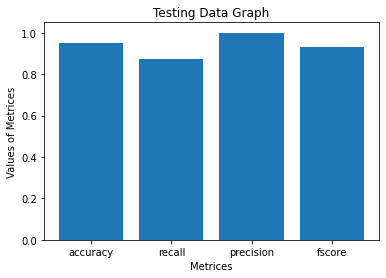

In [ ]:
labels = ['accuracy', 'recall', 'precision', 'fscore']
plt.bar(labels, [accuracy, recall, precision, fscore])
plt.title('Testing Data Graph')
plt.xlabel('Metrices')
plt.ylabel('Values of Metrices')
plt.show()

- Training Data

In [ ]:
accuracy = accuracy_score(y_train, y_pred_t)
recall = recall_score(y_train, y_pred_t)
precision = precision_score(y_train, y_pred_t)
fscore = f1_score(y_train, y_pred_t)

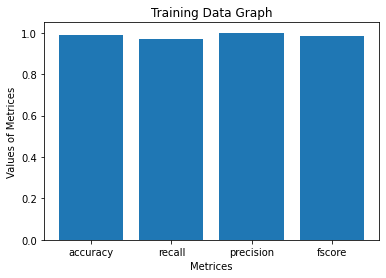

In [ ]:
labels = ['accuracy', 'recall', 'precision', 'fscore']
plt.bar(labels, [accuracy, recall, precision, fscore])
plt.title('Training Data Graph')
plt.xlabel('Metrices')
plt.ylabel('Values of Metrices')
plt.show()

## Conclusion

There seems to be an improvment in the above used metrics when model ensembling is used. This clearly shows the clear affect ensemble learning has
